In [1]:
# %%
from SonicBatt import utils
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

root_dir = utils.root_dir()
study_path = os.path.join(root_dir, 'studies', 'multi-cell_ml')
data_path = os.path.join(study_path, 'Raw Data')
visualisation_path = os.path.join(study_path, 'Visualisation')
ancillary_data_path = os.path.join(study_path, 'Ancillary Data')

database = pd.read_excel(os.path.join(data_path, 'database.xlsx'))
filter = database['discarded'] == 'N'
selected_cells = database.loc[filter, 'cell_id'].to_list()
df_cell_aliases =  pd.read_excel(os.path.join(data_path, 'database.xlsx'),
                              sheet_name='cell_aliases')
cell_aliases = {}
for _, row in df_cell_aliases.iterrows():
    cell_aliases[row['cell_id']] = row['cell_alias']

parquet_filename = 'signals_peaks_fft.parquet'
parquet_filepath = os.path.join(ancillary_data_path, parquet_filename)
df = pd.read_parquet(parquet_filepath)

frequencies_filename = 'frequencies.txt'
frequencies_filepath = os.path.join(ancillary_data_path, frequencies_filename)
freqs_id = np.loadtxt(frequencies_filepath)


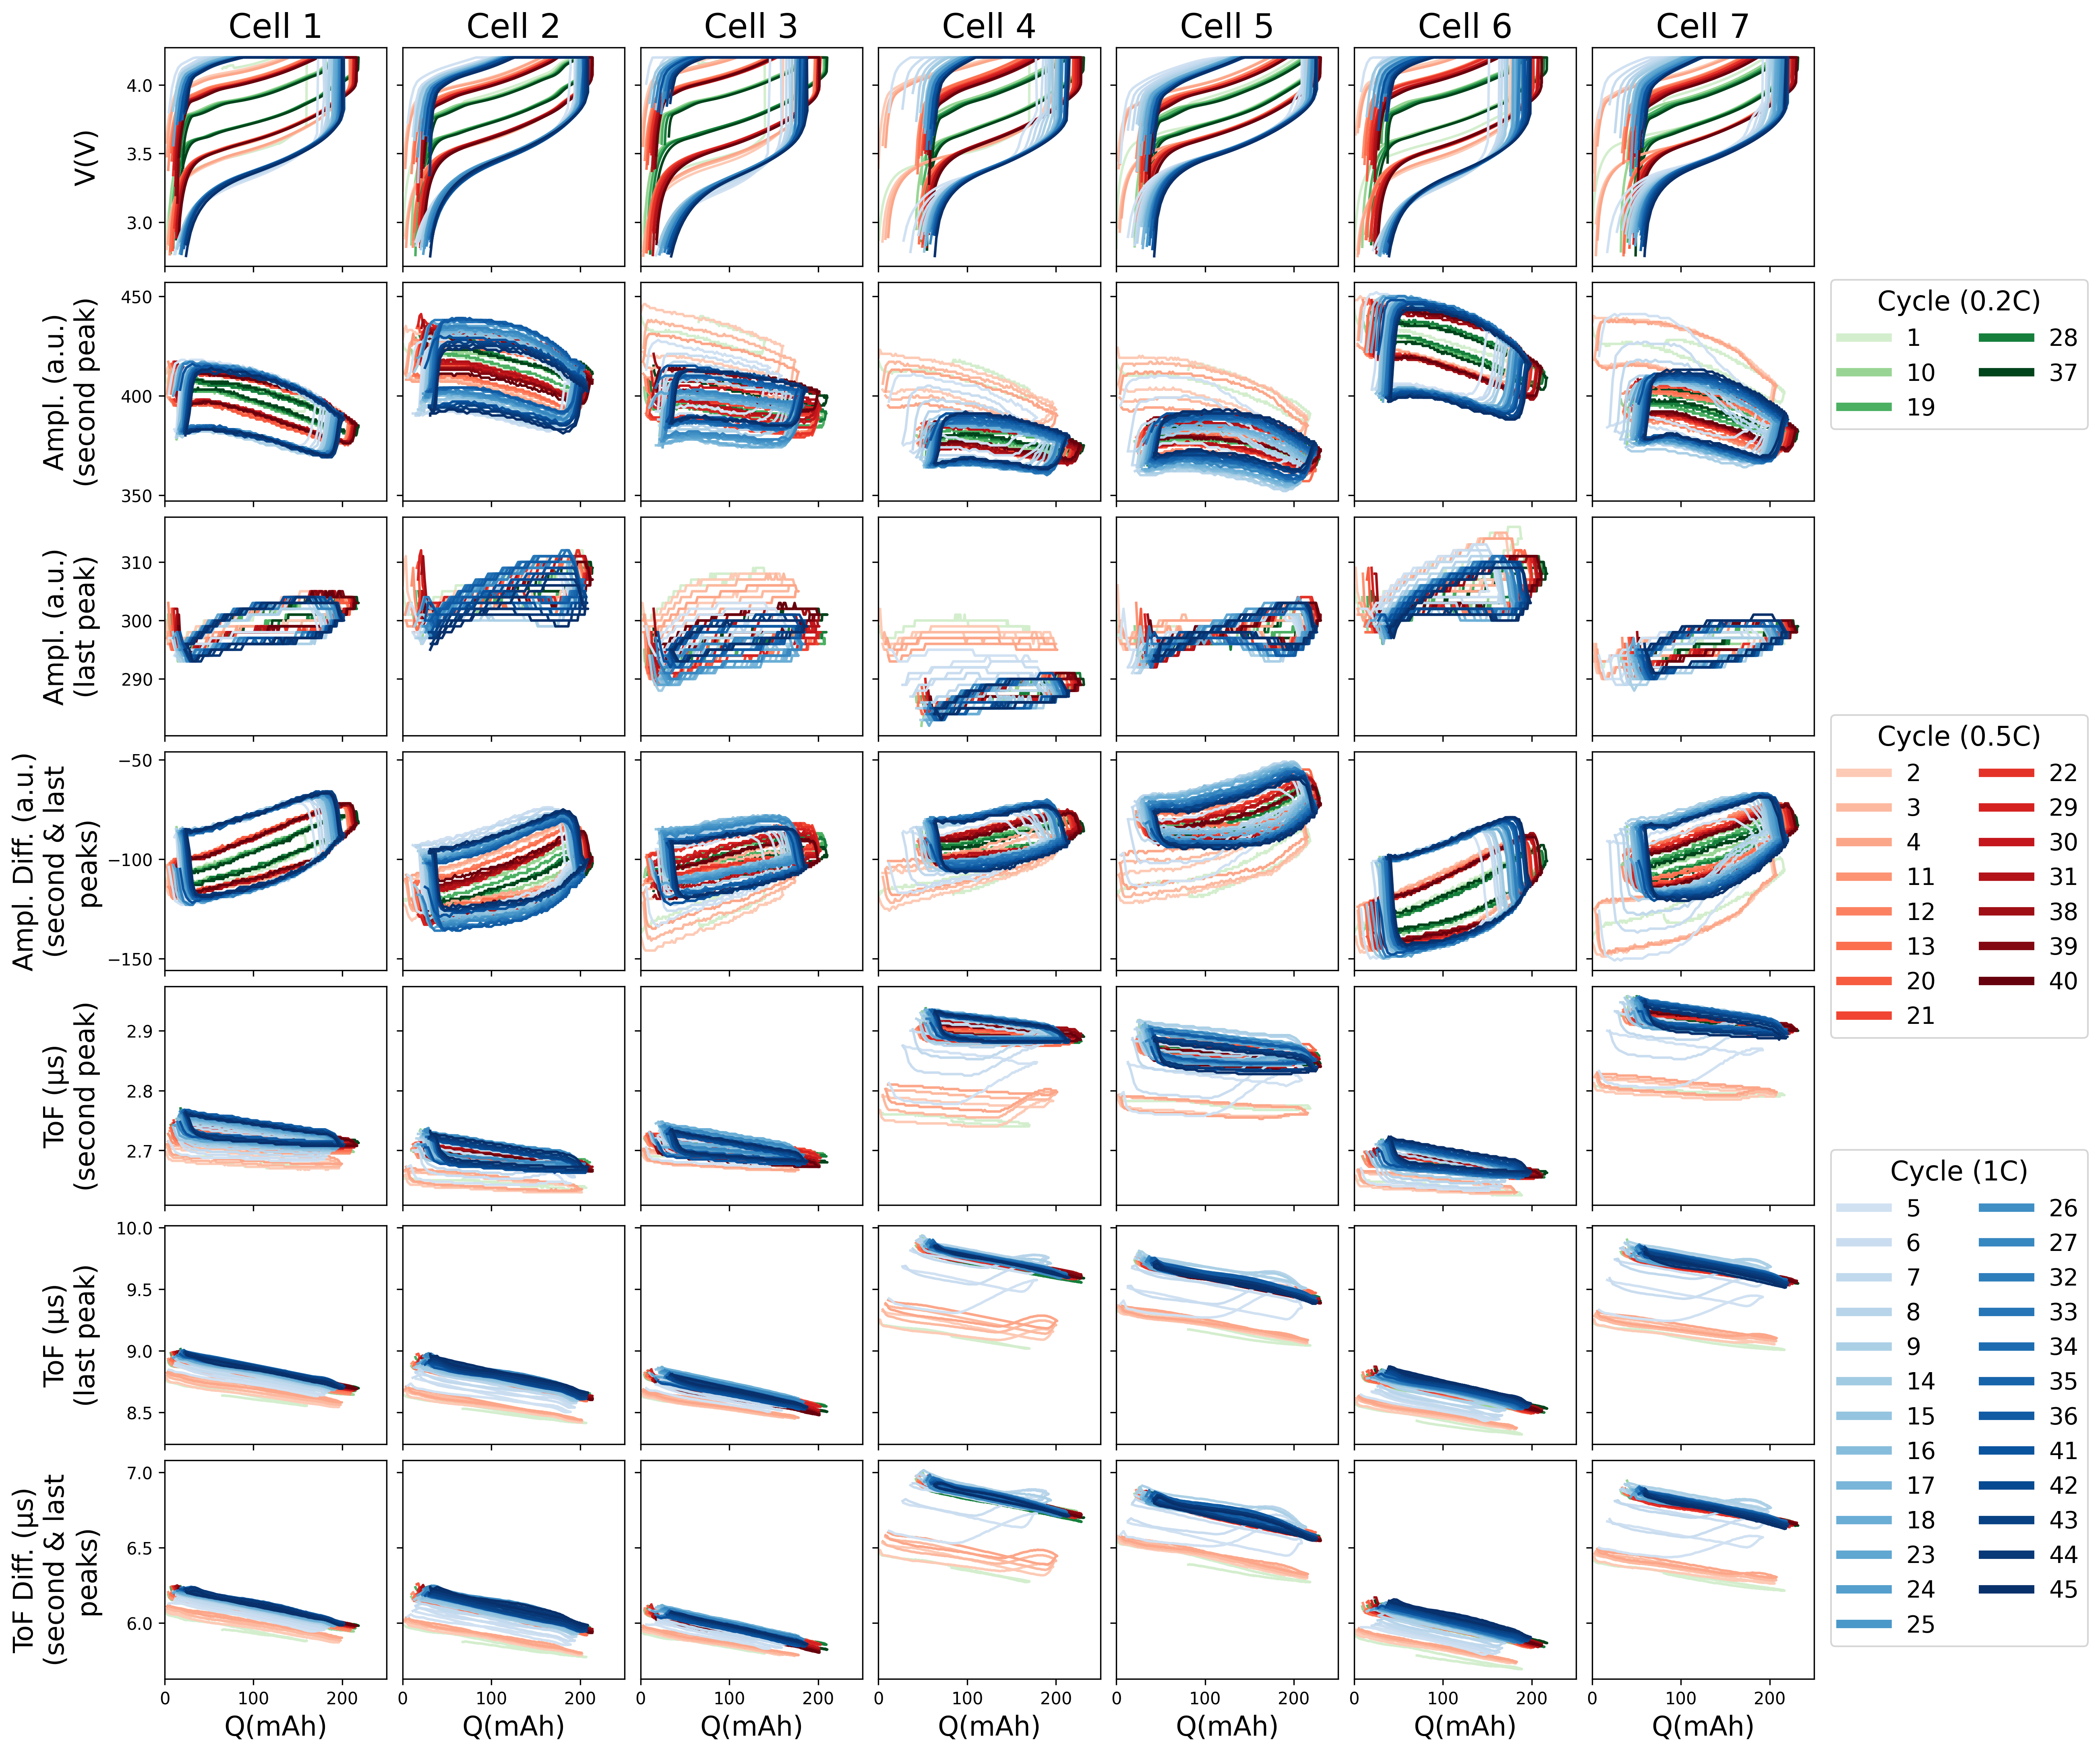

In [3]:
c_rates = [0.2, 0.5, 1]
# Time domain
save_filename = 'multicell_all_c_rates'
utils.multi_cell_plot(df, selected_cells, cell_aliases, x_quantity = 'Q(mAh)',
                      c_rates = c_rates, domain = 'time', relative_peaks = True,
                      save_filename = save_filename, visualisation_path = visualisation_path,
                      saveformat='pdf', axlabels_font_size=16, subtitle_font_size=20, ticksize=14)

In [ ]:
save_filename = 'multicell_0p2C'
f = utils.multi_cell_plot(df, selected_cells, cell_aliases, x_quantity = 'Q(mAh)',
                      c_rates = [0.2], domain = 'time', relative_peaks = True,
                      save_filename = save_filename, visualisation_path = visualisation_path,
                      saveformat='pdf', axlabels_font_size=16, subtitle_font_size=20, ticksize=14)

save_filename = 'multicell_0p5C'
f = utils.multi_cell_plot(df, selected_cells, cell_aliases, x_quantity = 'Q(mAh)',
                      c_rates = [0.5], domain = 'time', relative_peaks = True,
                      save_filename = save_filename, visualisation_path = visualisation_path,
                      saveformat='pdf', axlabels_font_size=16, subtitle_font_size=20, ticksize=14)

In [ ]:
save_filename = 'multicell_1p0C'
f = utils.multi_cell_plot(df, selected_cells, cell_aliases, x_quantity = 'Q(mAh)',
                      c_rates = [1], domain = 'time', relative_peaks = True,
                      save_filename = save_filename, visualisation_path = visualisation_path,
                      saveformat='pdf', axlabels_font_size=16, subtitle_font_size=20, ticksize=14)

In [ ]:
# %%
utils.multi_cell_plot(df, selected_cells, cell_aliases, x_quantity = 'V(V)',
                      c_rates = c_rates, domain = 'time', relative_peaks = True,
                      xlims = (2.7, 4.25))

# Frequency domain
# Frequency index closest to 2.25 MHz: 18
# Frequency index closest to 5 MHz: 41
utils.multi_cell_plot(df, selected_cells, cell_aliases, x_quantity = 'Q(mAh)',
                      c_rates = c_rates, domain = 'freq', freqs_1d = freqs_id, freq_ind_pair = (18, 41))

utils.multi_cell_plot(df, selected_cells, cell_aliases, x_quantity = 'V(V)',
                      c_rates = c_rates, domain = 'freq', freqs_1d = freqs_id, freq_ind_pair = (18, 41),
                      xlims = (2.7, 4.25))


In [ ]:
# %%
for cell_id in selected_cells:
    f, axs = plt.subplots(6, 1, figsize=(11,5), dpi=300,
        height_ratios = [1.5,1.5,1.5,1.5,1.5,2], sharex=True, #height_ratios = [2,3,1.5,2.5,1]
        constrained_layout=True)
    f.patch.set_facecolor('white')
    filter = df[('cycling', 'Cell_ID')] == cell_id
    utils.plot_cycling_data(df.loc[filter, 'cycling'], df.loc[filter,'peak_tofs'],
                      f, axs)
    f.suptitle('Cell {}'.format(cell_aliases[cell_id]))
    save_filename = '210_cccv_timeseries_cell_{}'.format(cell_aliases[cell_id])
    if cell_id == 'EG_Ac2':
        axs[2].set_ylim(22,28)
        axs[2].set_yticks([22,25,28])
        axs[3].set_yticks([0, 80, 160, 235])
        axs[3].set_ylim(0,235)
        axs[1].set_ylim(2.7, 4.35)
        axs[1].set_yticks([2.75, 4.2])
        axs[5].set_ylim(8.5, 9.1)
        axs[5].set_yticks([8.6, 8.8, 9])
        utils.save_figure(f, visualisation_path, save_filename, format='pdf')
    break


In [ ]:
# %%
cycle = 19
filter1 = df[('cycling','Cycle')] == cycle
filter2 = df[('cycling','Polarisation')] == '-'

import matplotlib.colors as mcolors
colors = plt.cm.tab10.colors  # Get colors from tab10
cmap = mcolors.ListedColormap(colors[:7][::-1]) # Reverse them to look prettier
from matplotlib.cm import ScalarMappable
y = np.arange(1,8)

x_quantity = 'Q_norm' # Q | 'Q_norm'

f, axs = plt.subplots(3,3, figsize=(8,8), constrained_layout=True,
                      sharex=True)
for i, cell_id in enumerate(selected_cells):
    filter3 = df[('cycling','Cell_ID')] == cell_id
    #
    V = df.loc[filter1 & filter2 & filter3, ('cycling', 'V(V)')].to_numpy()
    Q = df.loc[filter1 & filter2 & filter3, ('cycling', 'Q(mAh)')].to_numpy()
    Q_norm = (Q-Q.min()) / (Q.max()-Q.min())
    if x_quantity == 'Q':
        x = Q
        xlabel = 'Q\n(mAh)'
    elif x_quantity == 'Q_norm':
        x = Q_norm
        xlabel = 'Q\n(normalised per cell)'

    tof_8 = df.loc[filter1 & filter2 & filter3, ('peak_tofs', '8')].to_numpy()
    tof_2 = df.loc[filter1 & filter2 & filter3, ('peak_tofs', '1')].to_numpy()
    height_8 = df.loc[filter1 & filter2 & filter3, ('peak_heights', '8')].to_numpy()
    height_2 = df.loc[filter1 & filter2 & filter3, ('peak_heights', '1')].to_numpy()
    #
    axs[0,1].plot(x, V, c=colors[i])
    axs[1,0].plot(x, tof_8, c=colors[i])
    axs[1,1].plot(x, tof_2, c=colors[i])
    axs[1,2].plot(x, np.abs(tof_2-tof_8), c=colors[i])
    axs[2,0].plot(x, height_8, c=colors[i])
    axs[2,1].plot(x, height_2, c=colors[i])
    axs[2,2].plot(x, np.abs(height_2-height_8), c=colors[i])
    #
axs[0,1].set_title('Voltage')
axs[1,0].set_title('Last peak')
axs[1,1].set_title('2nd peak')
axs[1,2].set_title('|2nd minus last peak|')
axs[2,0].set_title('Last peak')
axs[2,1].set_title('2nd peak')
axs[2,2].set_title('|2nd minus last peak|')
#
axs[0,1].set_ylabel('V(V)',fontsize=14)
axs[1,0].set_ylabel('ToF',fontsize=14)
axs[2,0].set_ylabel('Amplitude',fontsize=14)
for ax in (axs[-1,0],axs[-1,1],axs[-1,2]):
    ax.set_xlabel(xlabel)

sm = ScalarMappable(cmap=cmap)
sm.set_array(y)
cbar = f.colorbar(sm, ax=axs, label='Cell ID', shrink=0.5, pad=0.02)
cbar.set_ticks(np.unique(y))
for ax in (axs[0,0], axs[0,2]):
    ax.axis('off')

f.suptitle('Cycle {} discharge\n---------------------------------------------------------------'.format(cycle))


In [ ]:
# %%
hist_bins = list(np.arange(15,30,0.5))
f, axs = plt.subplots(7,1,figsize=(5,7), sharex=True, sharey=True,
    constrained_layout=True)
for i, cell_id in enumerate(selected_cells):
    filter = df[('cycling','Cell_ID')] == cell_id
    Temp = df.loc[filter, ('cycling', 'Temp(degC)')].to_numpy()
    axs[i].hist(Temp, bins=hist_bins, edgecolor='black')
    axs[i].set_title('Cell {}'.format(cell_aliases[cell_id]))
axs[-1].set_xlabel('Temperature ($\circ$C)', fontsize=14)
f.supylabel('Number of waveforms', fontsize=14)

